# Matrixplot and Adjplot: Visualize and sort matrices with metadata

This guide introduces `Matrixplot` and `Adjplot`. They allow the user to sort a matrix according to some metadata and plot it as either a heatmap or a scattermap. These functions also allows the user to add color or tick axes to indicate the separation between different groups or attributes.

Note: `Matrixplot` and `Adjplot` have almost identical inputs/functionality. `Adjplot` is just a convenient wrapper around `Matrixplot` which assumes the matrix to be plotted is square and has the same row and column metadata.

In [1]:
from graspologic.simulations import sbm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from graspologic.plot import adjplot, matrixplot
import seaborn as sns


/home/runner/.cache/pypoetry/virtualenvs/graspologic-pkHfzCJ8-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Simulate a binary graph using stochastic block model
The 4-block model is defined as below:

\begin{align*}
n &= [50, 50, 50, 50]\\
P &= 
\begin{bmatrix}0.8 & 0.1 & 0.05 & 0.01\\
0.1 & 0.4 & 0.15 & 0.02\\
0.05 & 0.15 & 0.3 & 0.01\\
0.01 & 0.02 & 0.01 & 0.4
\end{bmatrix}
\end{align*}

Thus, the first 50 vertices belong to block 1, the second 50 vertices belong to block 2, the third 50 vertices belong to block 3, and the last 50 vertices belong to block 4.

Each block is associated with some metadata:

| Block Number | Hemisphere | region |
|:------------:|:----------:|:----:|
|       1      |      0     |   0  |
|       2      |      0     |   1  |
|       3      |      1     |   0  |
|       4      |      1     |   1  |




In [2]:
N = 50
n_communities = [N, N, N, N]
p = [[0.8, 0.1, 0.05, 0.01],
     [0.1, 0.4, 0.15, 0.02],
     [0.05, 0.15, 0.3, 0.01],
     [0.01, 0.02, 0.01, 0.4]]

np.random.seed(2)
A = sbm(n_communities, p)
meta = pd.DataFrame(
    data={
        'hemisphere': np.concatenate((np.full((1, 2*N), 0), np.full((1, 2*N), 1)), axis=1).flatten(),
        'region': np.concatenate((np.full((1, N), 0), np.full((1, N), 1), np.full((1, N), 0), np.full((1, N), 1)), axis=1).flatten(),
        'cell_size': np.arange(4*N)},
)

With no randomization, the original data looks like this:

(<Axes: >,
 <mpl_toolkits.axes_grid1.axes_divider.AxesDivider at 0x7fbde37f6530>)

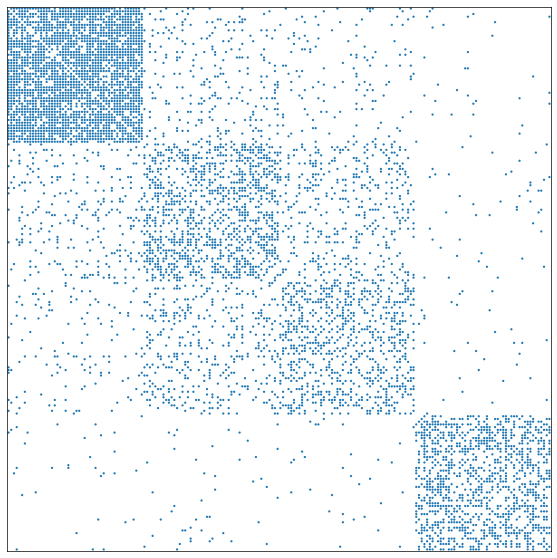

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
adjplot(
    data=A,
    ax=ax,
    meta=meta,
    plot_type="scattermap",
)

Randomize the data, so we can see the visual importance of matrix sorting:

In [4]:
rnd_idx = np.arange(4*N)
np.random.shuffle(rnd_idx)
A = A[np.ix_(rnd_idx, rnd_idx)]
meta = meta.reindex(rnd_idx)

The data immediately after randomization:

(<Axes: >,
 <mpl_toolkits.axes_grid1.axes_divider.AxesDivider at 0x7fbde3679900>)

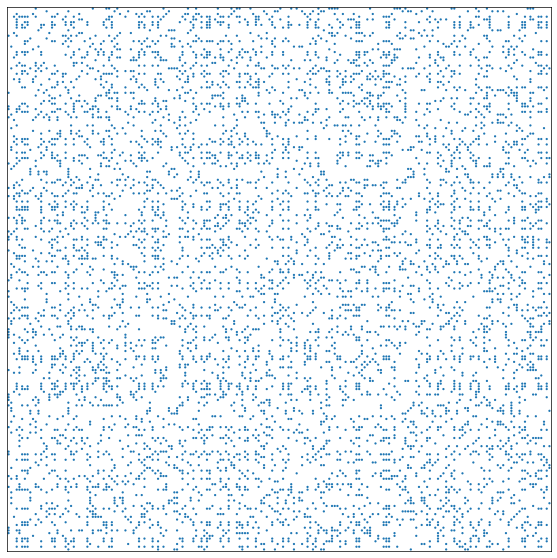

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
adjplot(
    data=A,
    ax=ax,
    meta=meta,
    plot_type="scattermap",
)

## The use of `group`

The parameter group can be a list or strings or np.array by which to group the matrix

### Group the matrix by one metadata (hemisphere)

(<Axes: >,
 <mpl_toolkits.axes_grid1.axes_divider.AxesDivider at 0x7fbde3d8d990>)

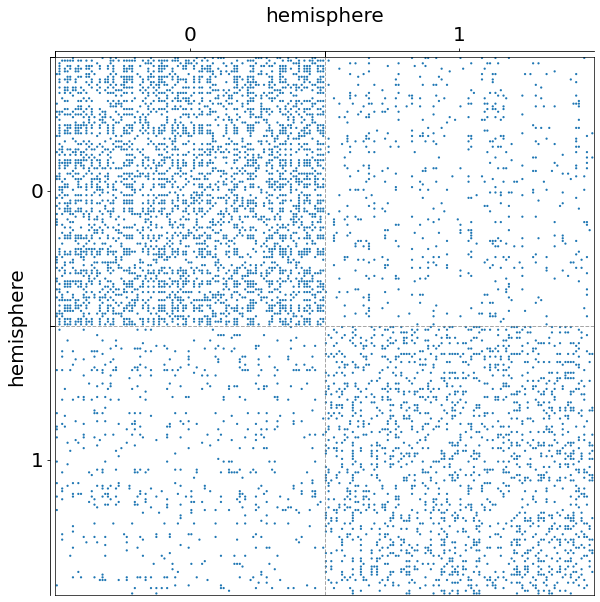

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
adjplot(
    data=A,
    ax=ax,
    meta=meta,
    plot_type="scattermap",
    group=["hemisphere"],
    sizes=(5, 5),
)

### Group the matrix by another metadata (region), but with a color axis to label the hemisphre

(<Axes: >,
 <mpl_toolkits.axes_grid1.axes_divider.AxesDivider at 0x7fbde3d8e650>)

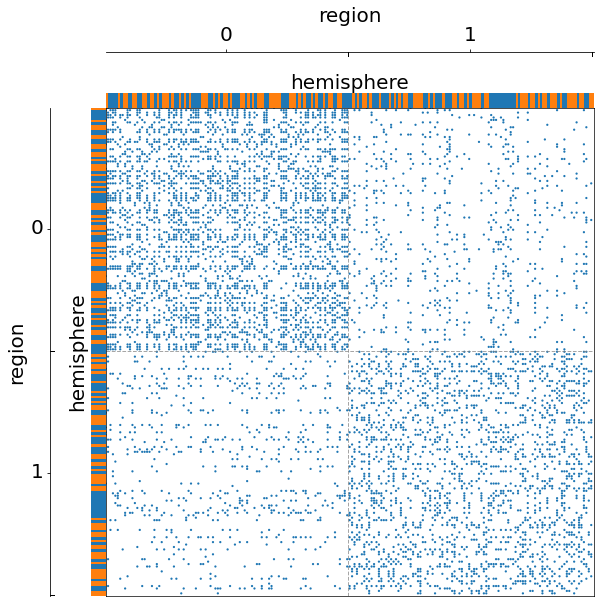

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
adjplot(
    data=A,
    ax=ax,
    meta=meta,
    plot_type="scattermap",
    group=["region"],
    color=["hemisphere"],
    sizes=(5, 5),
)

### Group by two metadata at the same time

Notice that the order of the list matters.

(<Axes: >,
 <mpl_toolkits.axes_grid1.axes_divider.AxesDivider at 0x7fbde40f5780>)

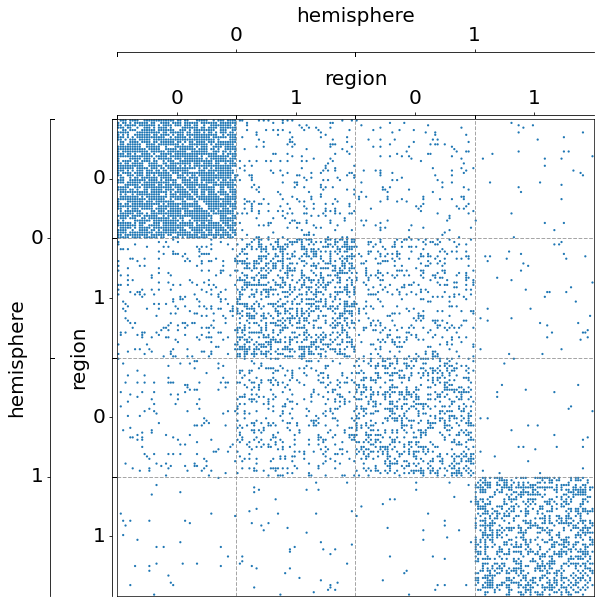

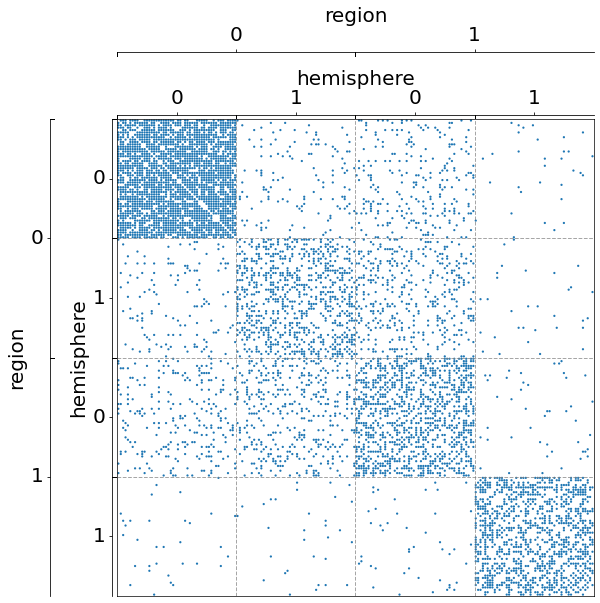

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
adjplot(
    data=A,
    ax=ax,
    meta=meta,
    plot_type="scattermap",
    group=["hemisphere", "region"],
)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
adjplot(
    data=A,
    ax=ax,
    meta=meta,
    plot_type="scattermap",
    group=["region", "hemisphere"],
)

## The use of `class_order`

### Sort the grouped classes by their sizes

If the grouped classes are of different sizes, we can sort them based on the size in ascending order.

In [9]:
from numpy.random import normal
N = 10
n_communities = [N, 3*N, 2*N, N]
p = [[0.8, 0.1, 0.05, 0.01],
     [0.1, 0.4, 0.15, 0.02],
     [0.05, 0.15, 0.3, 0.01],
     [0.01, 0.02, 0.01, 0.4]]
wt = [[normal]*4]*4
wtargs = [[dict(loc=5, scale=1)]*4]*4

np.random.seed(2)
A = sbm(n_communities, p, wt=wt, wtargs=wtargs)
meta = pd.DataFrame(
    data={
        'hemisphere': np.concatenate((np.full((1, 4*N), 0), np.full((1, 3*N), 1)), axis=1).flatten(),
        'region': np.concatenate((np.full((1, N), 0), np.full((1, 3*N), 1), np.full((1, 2*N), 0), np.full((1, N), 1)), axis=1).flatten(),
        'cell_size': np.arange(7*N),
        'axon_length': np.concatenate((np.random.normal(5, 1, (1, N)), np.random.normal(2, 1, (1, 3*N)), np.random.normal(5, 1, (1, 2*N)), np.random.normal(2, 1, (1, N))), axis=1).flatten()},
)
rnd_idx = np.arange(7*N)
np.random.shuffle(rnd_idx)
A = A[np.ix_(rnd_idx, rnd_idx)]
meta = meta.reindex(rnd_idx)


(<Axes: >,
 <mpl_toolkits.axes_grid1.axes_divider.AxesDivider at 0x7fbde3c8b6d0>)

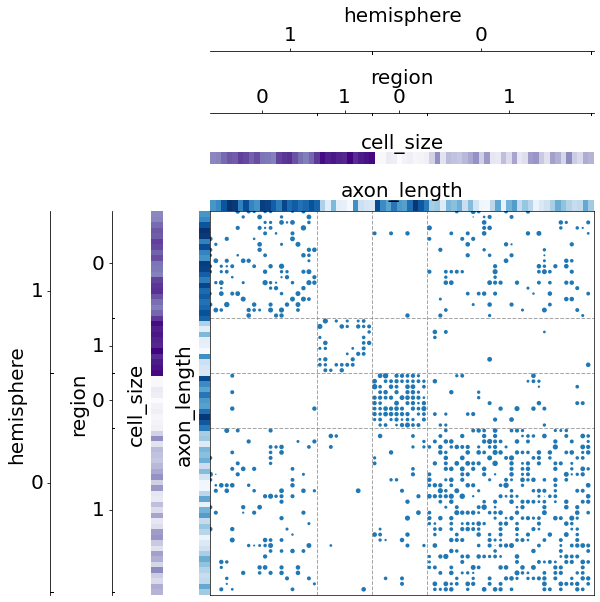

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
adjplot(
    data=A,
    ax=ax,
    meta=meta,
    plot_type="scattermap",
    group=["hemisphere", "region"],
    group_order="size", # note that this is a special keyword which was not in `meta`
    color=["cell_size", "axon_length"],
    palette=["Purples", "Blues"],
    sizes=(1, 30),
)

If the metadata has other fields, we can also sort by the mean of certain fields in ascending order

(<Axes: >,
 <mpl_toolkits.axes_grid1.axes_divider.AxesDivider at 0x7fbde3204b50>)

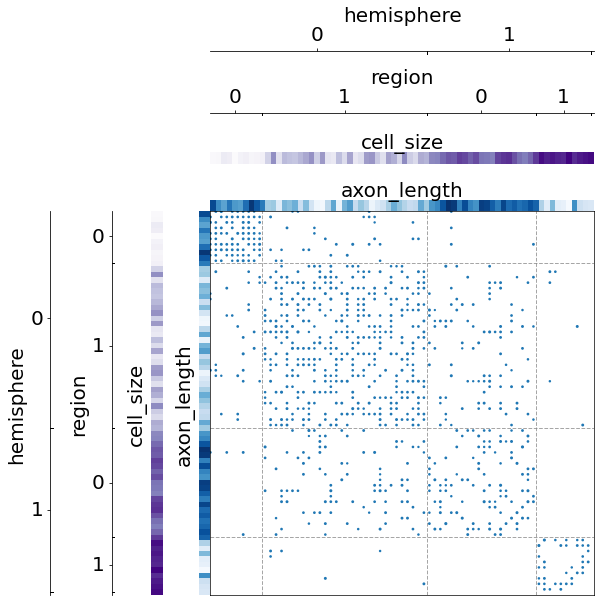

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
adjplot(
    data=A,
    ax=ax,
    meta=meta,
    plot_type="scattermap",
    group=["hemisphere", "region"],
    group_order=["cell_size"],
    color=["cell_size", "axon_length"],
    palette=["Purples", "Blues"],
)

We can also sort by multiple fields at the same time, including the size of the `group_class`.

(<Axes: >,
 <mpl_toolkits.axes_grid1.axes_divider.AxesDivider at 0x7fbde3dee350>)

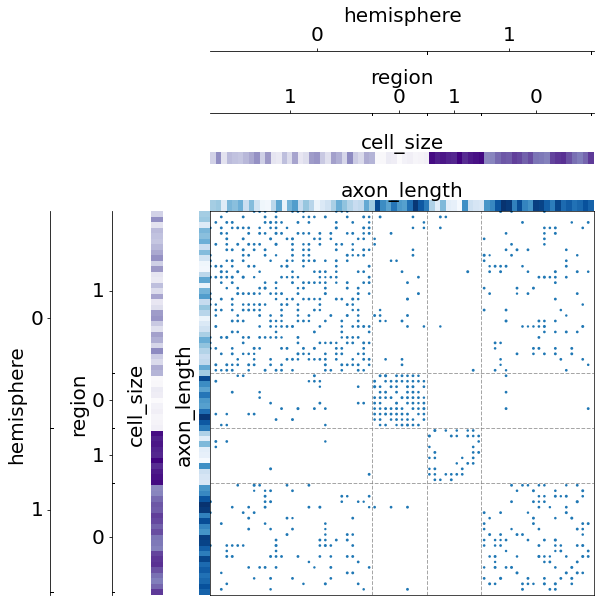

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
adjplot(
    data=A,
    ax=ax,
    meta=meta,
    plot_type="scattermap",
    group=["hemisphere", "region"],
    group_order=["cell_size", "axon_length"],
    color=["cell_size", "axon_length"],
    palette=["Purples", "Blues"],
)

## The use of `item_order`

The parameter `item_order` is used to sort items within each specific class

Without sorting by `item_order`, the matrix remain randomized in each grouped class:

(<Axes: >,
 <mpl_toolkits.axes_grid1.axes_divider.AxesDivider at 0x7fbdd994f5b0>)

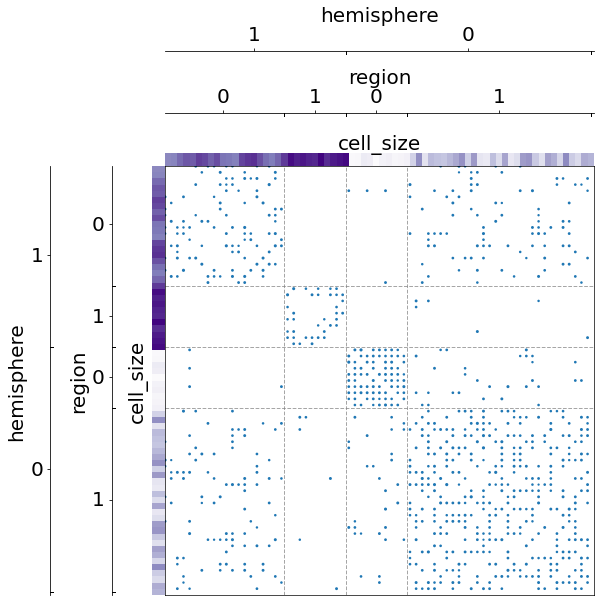

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
adjplot(
    data=A,
    ax=ax,
    meta=meta,
    plot_type="scattermap",
    group=["hemisphere", "region"],
    color=["cell_size"],
    palette="Purples",
)

But with sorting with `item_order`, the items are ordered within each grouped class:

(<Axes: >,
 <mpl_toolkits.axes_grid1.axes_divider.AxesDivider at 0x7fbdd9772cb0>)

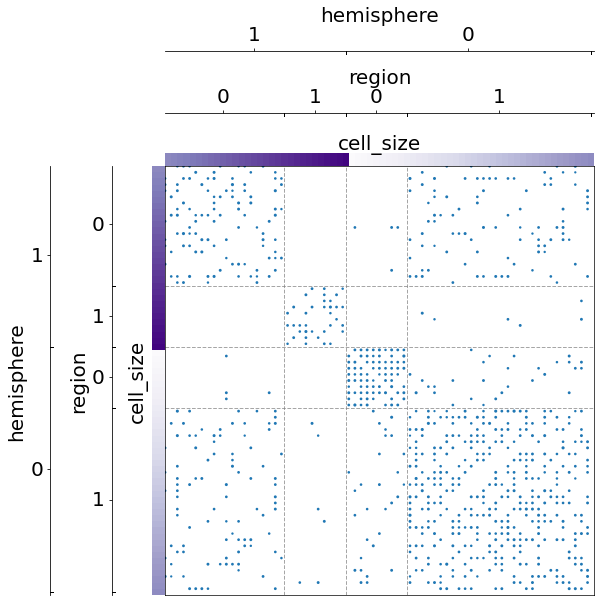

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
adjplot(
    data=A,
    ax=ax,
    meta=meta,
    plot_type="scattermap",
    group=["hemisphere", "region"],
    item_order=["cell_size"],
    color=["cell_size"],
    palette="Purples",
)

## The use of `highlight`
`highlight` can be used to highlight separators of a particular class with a different style

(<Axes: >,
 <mpl_toolkits.axes_grid1.axes_divider.AxesDivider at 0x7fbdd95bd900>)

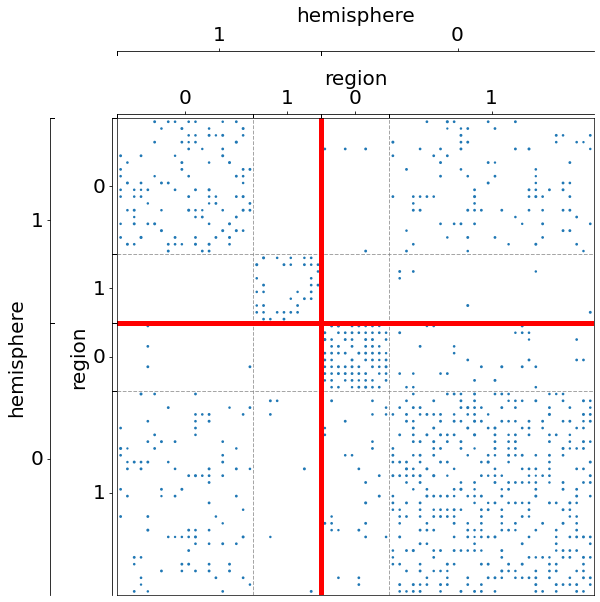

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
highlight_kws = dict(color="red", linestyle="-", linewidth=5)
adjplot(
    data=A,
    ax=ax,
    meta=meta,
    plot_type="scattermap",
    group=["hemisphere", "region"],
    highlight=["hemisphere"],
    highlight_kws=highlight_kws,
)

## The use of multiple palettes
Each color can be plotted with the same `palette`, or different palettes can be specified for each color

(<Axes: >,
 <mpl_toolkits.axes_grid1.axes_divider.AxesDivider at 0x7fbdd939fa60>)

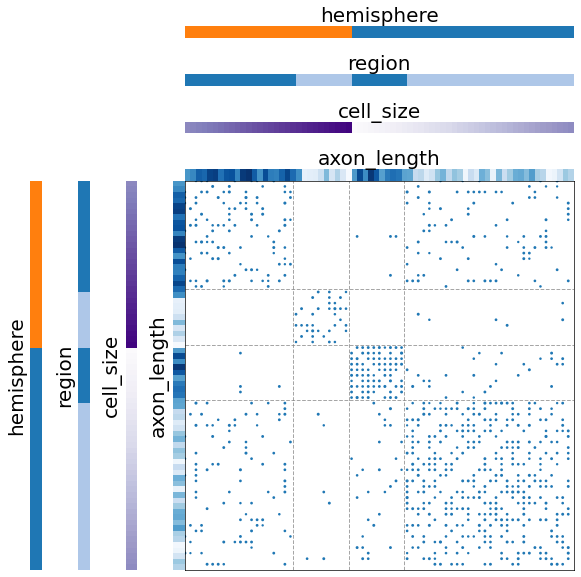

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
adjplot(
    data=A,
    ax=ax,
    meta=meta,
    plot_type="scattermap",
    group=["hemisphere", "region"],
    ticks=False,
    item_order=["cell_size"],
    color=["hemisphere", "region", "cell_size", "axon_length"],
    palette=["tab10", "tab20", "Purples", "Blues"],
)

## Label the row and column axes with different metadata
If you would like to group the row and columns by different metadata, you can use the `matrixplot` function to specify the parameters for both of the axes. Most arguments are the same, with the addition of `row_` or `col_` to specify the corresponding axis of `data`.

Note: for adjacency matrices, one should not sort the rows and columns separately, as it breaks the representation of the graph. Here we do so just for demonstration, assuming `A` is not an adjacency matrix.

(<Axes: >,
 <mpl_toolkits.axes_grid1.axes_divider.AxesDivider at 0x7fbdd95da9b0>)

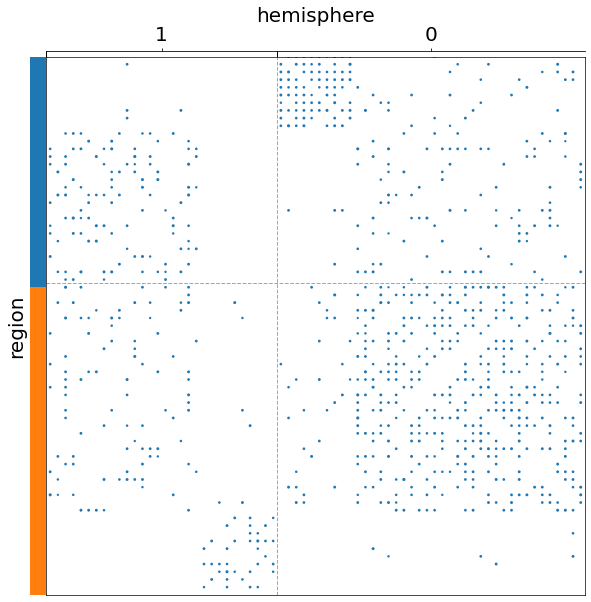

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
matrixplot(
    data=A,
    ax=ax,
    col_meta=meta,
    row_meta=meta,
    plot_type="scattermap",
    col_group=["hemisphere"],
    row_group=["region"],
    col_item_order=["cell_size"],
    row_item_order=["cell_size"],
    row_color=["region"],
    row_ticks=False,
)

## Plot using `heatmap` instead of `scattermap`

(<Axes: >,
 <mpl_toolkits.axes_grid1.axes_divider.AxesDivider at 0x7fbdd90efeb0>)

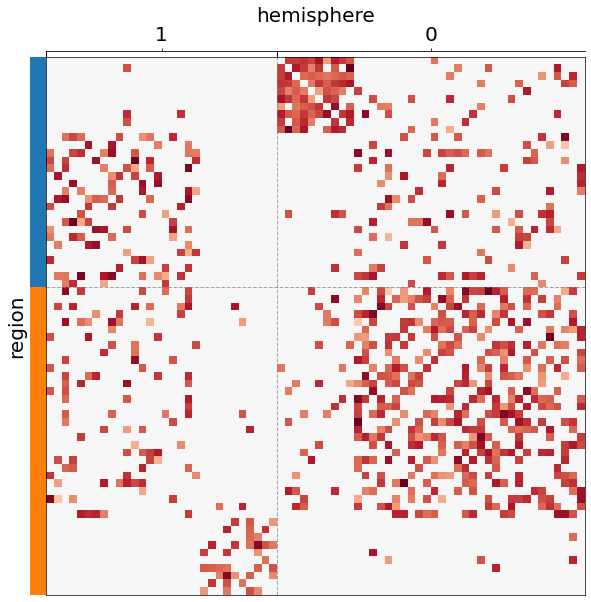

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
matrixplot(
    data=A,
    ax=ax,
    col_meta=meta,
    row_meta=meta,
    plot_type="heatmap",
    col_group=["hemisphere"],
    row_group=["region"],
    col_item_order=["cell_size"],
    row_item_order=["cell_size"],
    row_color=["region"],
    row_ticks=False,
)

## Supply array-likes instead of `meta`
If `meta` is not provided, each of the sorting/grouping/coloring keywords can be supplied with array-like data structures.

In [19]:
group_0 = np.concatenate((np.full((4*N, 1), 0), np.full((3*N, 1), 1)), axis=0)
group_1 = np.concatenate((np.full((N, 1), 0), np.full((3*N, 1), 1), np.full((2*N, 1), 0), np.full((N, 1), 1)), axis=0)
group = np.concatenate((group_0, group_1), axis=1)

group = group[rnd_idx, :]


(<Axes: >,
 <mpl_toolkits.axes_grid1.axes_divider.AxesDivider at 0x7fbdd8fadf60>)

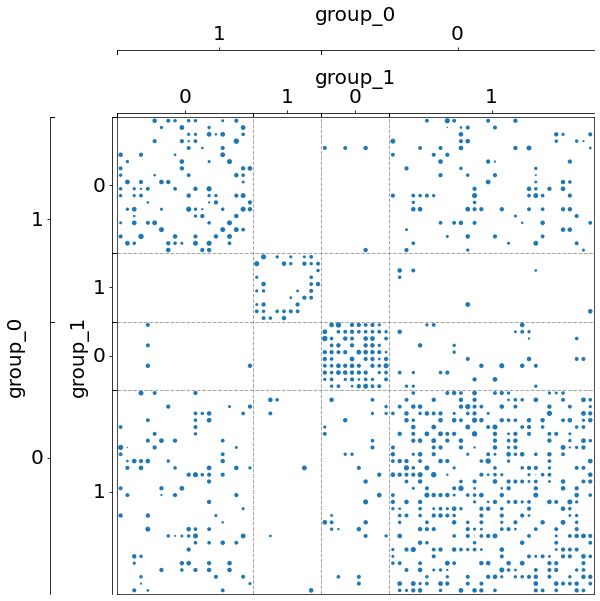

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
adjplot(
    data=A,
    ax=ax,
    plot_type="scattermap",
    group=group,
    sizes=(1, 30),
)